# Imports

In [21]:
import torch
import requests
from PIL import Image
from io import BytesIO
from diffusers import StableDiffusionImg2ImgPipeline, StableDiffusionInpaintPipeline, StableDiffusionDepth2ImgPipeline

In [2]:
from utils import get_device, plot_img

# Constants

In [19]:
model_name = "stabilityai/stable-diffusion-2-1"
inpainting_model = "stabilityai/stable-diffusion-2-inpainting"
depth_model = "stabilityai/stable-diffusion-2-depth"

In [5]:
device = get_device()
device

'cuda'

# Functions

In [4]:
def download_image(url):
    response = requests.get(url)
    return Image.open(BytesIO(response.content)).convert("RGB")

# Img2Img

In [6]:
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_name, torch_dtype=torch.float16).to(device)

Fetching 13 files: 100%|██████████| 13/13 [00:00<00:00, 221650.21it/s]
/home/shane/projects/.venv/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [7]:
url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"
init_image = download_image(url)
init_image.thumbnail((768, 768))

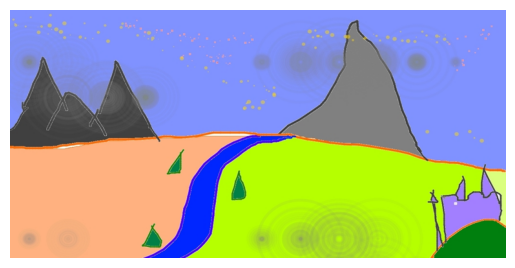

In [8]:
plot_img(init_image)

In [9]:
prompt = "A cyberpunk landscape"

In [10]:
images = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images

100%|██████████| 37/37 [00:06<00:00,  5.86it/s]


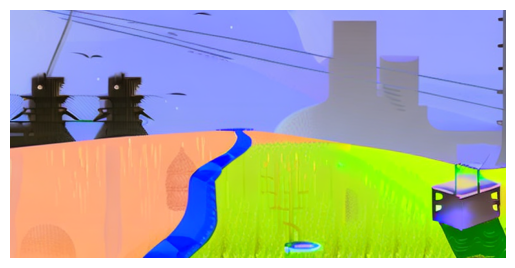

In [11]:
plot_img(images[0])

# Inpainting

In [12]:
img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

In [13]:
init_image = download_image(img_url).resize((512, 512))
mask_image = download_image(mask_url).resize((512, 512))

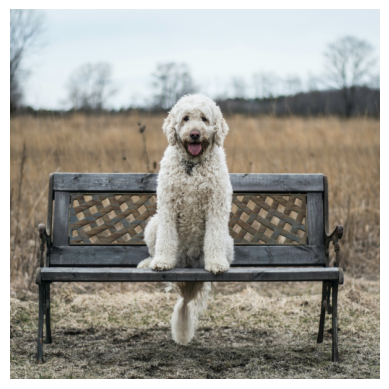

In [14]:
plot_img(init_image)

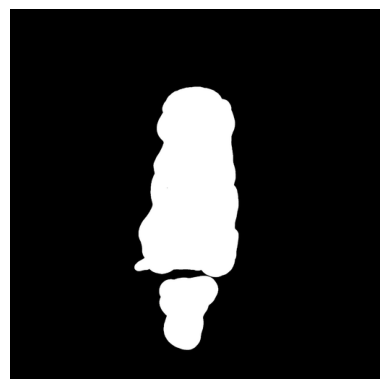

In [15]:
plot_img(mask_image)

In [16]:
pipe = StableDiffusionInpaintPipeline.from_pretrained(inpainting_model, torch_dtype=torch.float16).to(device)

Fetching 13 files: 100%|██████████| 13/13 [00:00<00:00, 145791.32it/s]


In [17]:
prompt = "Face of a yellow cat, high resolution, sitting on a park bench"
image = pipe(prompt=prompt, image=init_image, mask_image=mask_image).images[0]

100%|██████████| 50/50 [00:05<00:00,  9.55it/s]


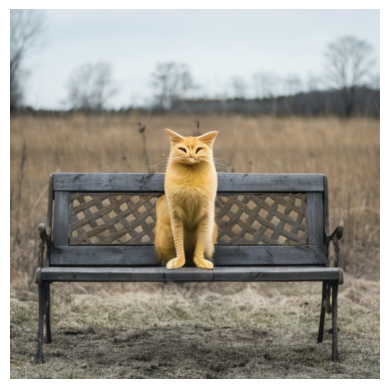

In [18]:
plot_img(image)

# Depth2Img

In [22]:
pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(depth_model, torch_dtype=torch.float16).to(device)































































































































































































































































































Fetching 15 files:  13%|█▎        | 2/15 [01:02<07:56, 36.68s/it]









































































































































































































































































































































































































Fetching 15 files:  47%|████▋     | 7/15 [02:15<02:29, 18.73s/it]































































































































































































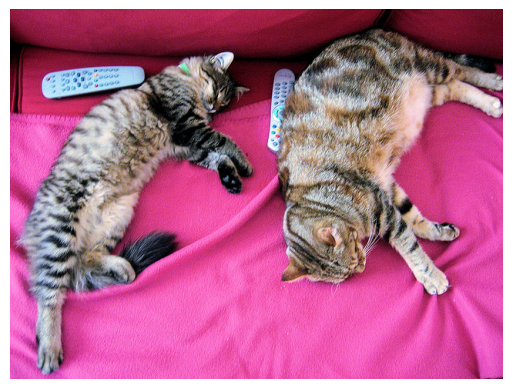

In [23]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
init_image = download_image(url)
plot_img(init_image)

100%|██████████| 35/35 [00:04<00:00,  7.01it/s]


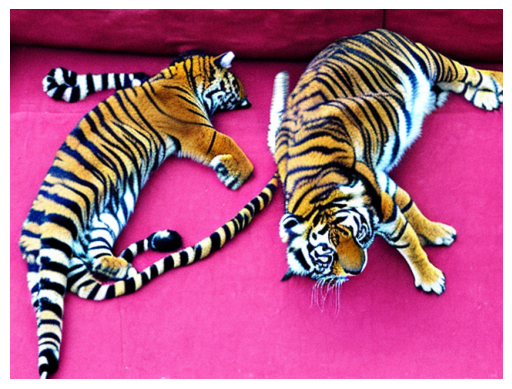

In [24]:
prompt = "two tigers"
n_prompt = "bad, deformed, ugly, bad anatomy"
image = pipe(prompt=prompt, image=init_image, negative_prompt=n_prompt, strength=0.7).images[0]
plot_img(image)